In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Rampas

In [2]:
def get_new_route(t_total, Fs):
    return np.zeros([t_total*Fs])

def get_rampa(t_init, t_change, delta_v, t_total, Fs=100):
    return np.pad(np.linspace(0, delta_v, t_change*Fs),(t_init*Fs, t_total*Fs-t_init*Fs-t_change*Fs), 'constant', constant_values=(0,delta_v))

def get_route_ramped(points, t_max, Fs=100):
    ramped = np.zeros([t_max*Fs])
    if len(points):
        ramped += points[0][1]
    for i in range(len(points) - 1):
        ramped += get_rampa(points[i][0], points[i + 1][0] - points[i][0], points[i + 1][1] - points[i][1], t_max)
    return ramped

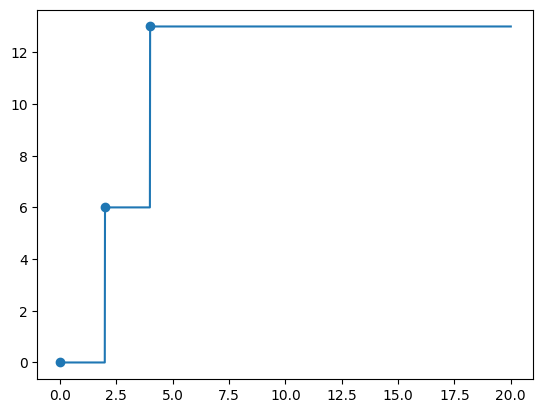

In [13]:
dict_notes = {0.0: 'D3', 0.5: 'D#3', 1.0: 'E3', 1.5: 'F3', 2.0: 'F#3', 2.5: 'G3', 3.0: 'G#3', 3.5: 'A3', 4.0: 'A#3', 4.5: 'B3', 5.0: 'C4', 5.5: 'C#4', 6.0: 'D4', 6.5: 'D#4', 7.0: 'E4', 7.5: 'F4', 8.0: 'F#4', 8.5: 'G4', 9.0: 'G#4', 9.5: 'A4', 10.0: 'A#4', 10.5: 'B4', 11.0: 'C5', 11.5: 'C#5', 12.0: 'D5', 12.5: 'D#5', 13.0: 'E5', 13.5: 'F5', 14.0: 'F#5', 14.5: 'G5', 15.0: 'G#5', 15.5: 'A5', 17.0: 'C6'}
dict_notes_rev = {}
for key, item in dict_notes.items():
    dict_notes_rev[item] = key

notas = [[0, 'D3'],
         [2, 'D4'],
         [4, 'E5']]

t = np.linspace(0, 20, 2000)
f = get_new_route(20, 100)

x_points = []
y_points = []
alt_i = 0
for n in notas:
    x_points.append(n[0])
    y_points.append(dict_notes_rev[n[1]])
    f += np.heaviside(t - n[0], 0.5) * (dict_notes_rev[n[1]] - alt_i)
    alt_i = dict_notes_rev[n[1]]

plt.scatter(x_points, y_points)
plt.plot(t, f)

In [10]:
dict_notes_rev

{'D3': 0.0,
 'D#3': 0.5,
 'E3': 1.0,
 'F3': 1.5,
 'F#3': 2.0,
 'G3': 2.5,
 'G#3': 3.0,
 'A3': 3.5,
 'A#3': 4.0,
 'B3': 4.5,
 'C4': 5.0,
 'C#4': 5.5,
 'D4': 6.0,
 'D#4': 6.5,
 'E4': 7.0,
 'F4': 7.5,
 'F#4': 8.0,
 'G4': 8.5,
 'G#4': 9.0,
 'A4': 9.5,
 'A#4': 10.0,
 'B4': 10.5,
 'C5': 11.0,
 'C#5': 11.5,
 'D5': 12.0,
 'D#5': 12.5,
 'E5': 13.0,
 'F5': 13.5,
 'F#5': 14.0,
 'G5': 14.5,
 'G#5': 15.0,
 'A5': 15.5,
 'C6': 17.0}

#### Example

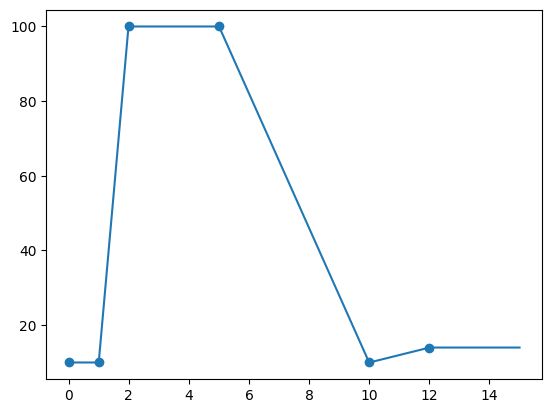

In [3]:
points = np.array([[0,10], [1,10], [2, 100], [5, 100], [10, 10], [12, 14]])

t = np.linspace(0, 15, 1500)
f = get_route_ramped(points, 15)
plt.scatter(points[:,0], points[:,1])
plt.plot(t, f)

## Vibrato

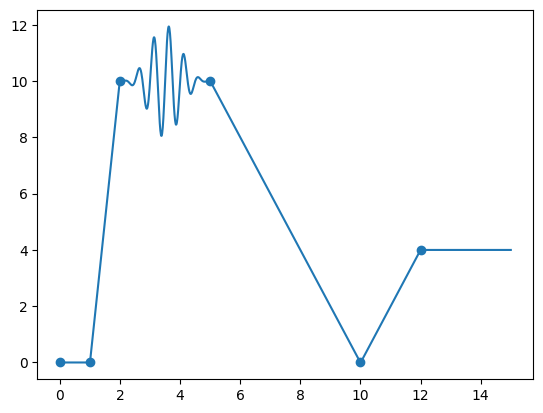

In [14]:
ventanas = {'rect': np.ones, 'triangular': np.bartlett, 'blackman': np.blackman, 'hamming': np.hamming, 'hanning': np.hanning, 'kaiser1': lambda x: np.kaiser(x, 1), 'kaiser2': lambda x: np.kaiser(x, 2), 'kaiser3': lambda x: np.kaiser(x, 3), 'kaiser4': lambda x: np.kaiser(x, 4)}

def sum_vibrato(func, t_inicio, t_vibrato, amp, freq, ventana, t_max, Fs=100):
    ventana = ventanas[ventana]
    t = np.linspace(0, t_max, t_max*Fs)
    return func + np.pad(ventana(t_vibrato*100), (t_inicio*100,t_max*100-t_vibrato*100-t_inicio*100)) * amp * np.sin(freq*np.pi*t)

points = np.array([[0,0], [1,0], [2, 10], [5, 10], [10, 0], [12, 4]])

t = np.linspace(0, 15, 1500)
f = get_route_ramped(points, 15)
f = sum_vibrato(f, 2, 3, 2, 4, 'blackman', 15)
plt.scatter(points[:,0], points[:,1])
plt.plot(t, f)

## Filtros

In [15]:
import scipy.signal as signal

In [16]:
Fs = 100
fp = 0.1
fs = 0.15
fc = (fp+fs)/2
n  = 900

## hamming
def hamming_filter(f, numtaps, cutoff, Fs):
    flt = signal.firwin(numtaps=numtaps, cutoff=cutoff, window="hamming", pass_zero="lowpass", fs=Fs)
    A = [1] +  [0 for i in range(numtaps-1)]
    w, gd = signal.group_delay((flt, A), fs=Fs)
    return signal.lfilter(flt, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

## hann
def hann_filter(f, numtaps, cutoff, Fs):
    flt = signal.firwin(numtaps=numtaps, cutoff=cutoff, window="hann", pass_zero="lowpass", fs=Fs)
    A = [1] +  [0 for i in range(numtaps-1)]
    w, gd = signal.group_delay((flt, A), fs=Fs)
    return signal.lfilter(flt, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

## blackman
def blackman_filter(f, numtaps, cutoff, Fs):
    flt = signal.firwin(numtaps=numtaps, cutoff=cutoff, window="blackman", pass_zero="lowpass", fs=Fs)
    A = [1] +  [0 for i in range(numtaps-1)]
    w, gd = signal.group_delay((flt, A), fs=Fs)
    return signal.lfilter(flt, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

## bartlett
def bartlett_filter(f, numtaps, cutoff, Fs):
    flt = signal.firwin(numtaps=numtaps, cutoff=cutoff, window="bartlett", pass_zero="lowpass", fs=Fs)
    A = [1] +  [0 for i in range(numtaps-1)]
    w, gd = signal.group_delay((flt, A), fs=Fs)
    return signal.lfilter(flt, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

## rect
def rect_filter(f, numtaps, cutoff, Fs):
    flt = signal.firwin(numtaps=numtaps, cutoff=cutoff, window="boxcar", pass_zero="lowpass", fs=Fs)
    A = [1] +  [0 for i in range(numtaps-1)]
    w, gd = signal.group_delay((flt, A), fs=Fs)
    return signal.lfilter(flt, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

In [17]:
## remez
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 0.2

def remez_filter(f, Ap, As, fp, fs, Fs):
    delta_p = (10**(Ap/20)-1)/(10**(Ap/20)+1)
    delta_s = (1+delta_p)/(10**(As/20))
    n = int(np.ceil((-20*np.log10(np.sqrt(delta_p*delta_s))-13)/(2.324*((fs-fp)/Fs)*2*np.pi)+1))
    if not n%2:
        n+=1
    print(n)
    flt = signal.remez(n, [0, fp, fs, 0.5*Fs], [1, 0], fs=Fs)
    A = [1] +  [0 for i in range(n-1)]
    w, gd = signal.group_delay((flt, A), fs=Fs)
    return signal.lfilter(flt, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

In [18]:
## butterworth
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 2

def butter_filter(f, Ap, As, fp, fs, Fs):
    N, Wn = signal.buttord(fp, fs, Ap, As, fs=Fs)
    B, A = signal.butter(N, Wn, btype='low', fs=Fs)
    w, gd = signal.group_delay((B, A), fs=Fs)
    return signal.lfilter(B, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

In [19]:
## cheb 1
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 2
rp = 1

def cheb1_filter(f, Ap, As, fp, fs, rp, Fs):
    n, wn = signal.cheb1ord(fp, fs, Ap, As, fs=Fs)
    B, A  = signal.cheby1(n, rp, wn, 'low', fs=Fs)
    w, gd = signal.group_delay((B, A), fs=Fs)
    return signal.lfilter(B, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

## cheb2
def cheb2_filter(f, Ap, As, fp, fs, rp, Fs):
    n, wn = signal.cheb2ord(fp, fs, Ap, As, fs=Fs)
    B, A  = signal.cheby2(n, rp, wn, 'low', fs=Fs)
    w, gd = signal.group_delay((B, A), fs=Fs)
    return signal.lfilter(B, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

In [20]:
## elliptic
Fs = 100
Ap = 1
As = 50
fp = 0.1
fs = 0.4
rp = 1

def ellip_filter(f, Ap, As, fp, fs, Fs):
    n, wn = signal.ellipord(fp, fs, Ap, As, fs=Fs)
    B, A  = signal.ellip(n, Ap, As, wn, 'low', fs=Fs)
    w, gd = signal.group_delay((B, A), fs=Fs)
    return signal.lfilter(B, A, np.pad(f, (int(gd[0]), int(gd[0])), 'constant', constant_values=(f[0], f[-1])))[2*int(gd[0]):]

In [21]:
def filter_func(f, filter, params, Fs):
    if filter == "firwin":
        '''
        params = [window, n, cutoff]
        '''
        window = params[0]
        n = params[1]
        cutoff = params[2]
        if window == "hamming":
            return hamming_filter(f, n, cutoff, Fs)
        elif window == "hann":
            return hann_filter(f, n, cutoff, Fs)
        elif window == "blackman":
            return blackman_filter(f, n, cutoff, Fs)
        elif window == "bartlett":
            return bartlett_filter(f, n, cutoff, Fs)
        elif window == "rect":
            return rect_filter(f, n, cutoff, Fs)
        else:
            raise Exception("Parameters for filter not valid")
    elif filter == "remez":
        """ 
        params = [Ap, As, fp, fs]
        """
        Ap = params[0]
        As = params[1]
        fp = params[2]
        fs = params[3]
        return remez_filter(f, Ap, As, fp, fs, Fs)
    elif filter == "butter":
        """ 
        params = [Ap, As, fp, fs]
        """
        Ap = params[0]
        As = params[1]
        fp = params[2]
        fs = params[3]
        return butter_filter(f, Ap, As, fp, fs, Fs)
    elif filter == "chebyshev":
        """ 
        params = [n, Ap, As, fp, fs]
        """
        n  = params[0]
        Ap = params[1]
        As = params[2]
        fp = params[3]
        fs = params[4]
        rp = params[5]
        if n == 1:
            return cheb1_filter(f, Ap, As, fp, fs, rp, Fs)
        elif n == 2:
            return cheb2_filter(f, Ap, As, fp, fs, rp, Fs)
    elif filter == "elliptic":
        """ 
        params = [Ap, As, fp, fs]
        """
        Ap = params[0]
        As = params[1]
        fp = params[2]
        fs = params[3]
        return ellip_filter(f, Ap, As, fp, fs, Fs)
    else:
        raise Exception("Filter not implemented, try with firwin, remez, butter, chebyshev or elliptic")

#### Example

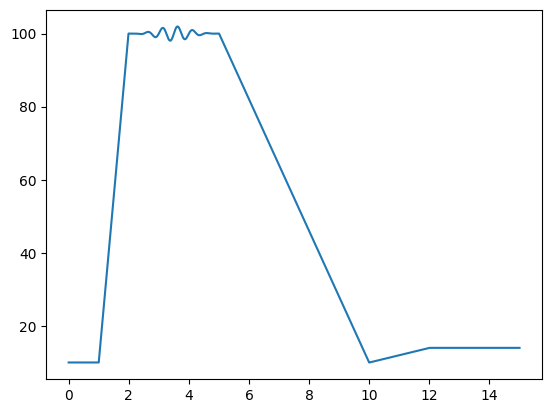

In [22]:
points = np.array([[0,10], [1,10], [2, 100], [5, 100], [10, 10], [12, 14]])

t = np.linspace(0, 15, 1500)
f = get_route_ramped(points, 15)

# f = filter_func(f, "firwin", ["hamming", 500, 0.4], 100)
# f = filter_func(f, "firwin", ["hann", 500, 30], 100)
# f = filter_func(f, "firwin", ["blackman", 500, 0.4], 100)
# f = filter_func(f, "firwin", ["bartlett", 500, 0.4], 100)
# f = filter_func(f, "firwin", ["rect", 500, 0.4], 100)

# f = filter_func(f, "remez", [1, 50, 0.1, 0.5], 100)

# f = filter_func(f, "butter", [1, 50, 0.4, 1], 100)

# f = filter_func(f, "chebyshev", [1, 1, 50, 0.4, 1, 1], 100)
# f = filter_func(f, "chebyshev", [2, 1, 20, 0.1, 0.2, 1], 100)

# f = filter_func(f, "elliptic", [1, 20, 0.3, 0.6], 100)

f = sum_vibrato(f, 2, 3, 2, 4, 'blackman', 15)
#plt.scatter(points[:,0], points[:,1])
plt.plot(t, f)

### Part of function

In [23]:
def filter_part_func(f, i_init, i_end, filter, params, Fs):
    f_sub = f[i_init*Fs:i_end*Fs]
    filtered = filter_func(f_sub, filter, params, Fs)
    f[i_init*Fs:i_end*Fs] = filtered
    return f

100.0

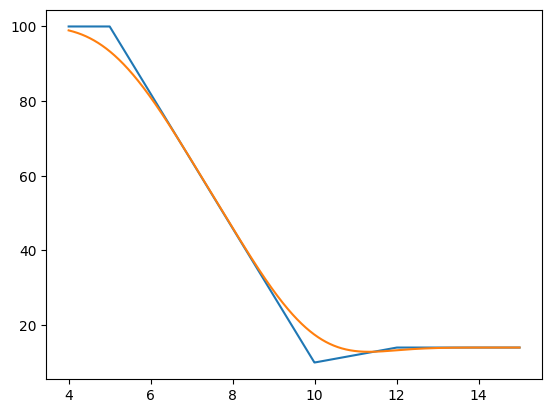

In [24]:
#plt.scatter(points[:,0], points[:,1])
i_init = 4
i_end = 15
Fs = 100
t = np.linspace(0, 15, 1500)
f = get_route_ramped(points, 15)
f_cut = f[i_init*Fs:i_end*Fs]
t_cut = t[i_init*Fs:i_end*Fs]
f_flt = filter_func(f_cut, "firwin", ["hann", 500, 0.01], 100)

plt.plot(t_cut, f_cut)
plt.plot(t_cut, f_flt)

f_cut[0]

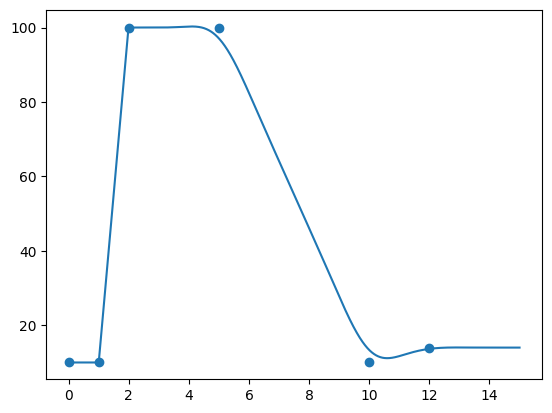

In [28]:
t = np.linspace(0, 15, 1500)
f = get_route_ramped(points, 15)
f = filter_part_func(f, 3, 14, "firwin", ["hann", 500, 0.4], 100)
#f = sum_vibrato(f, 2, 3, 2, 4, 'blackman', 15)
plt.scatter(points[:,0], points[:,1])
plt.plot(t, f)

## Cambiar duracion

In [58]:
def lengthen_func(f, new_t_max, Fs):
    return np.linspace(0, new_t_max, new_t_max*Fs), np.hstack([f, f[-1]*np.ones([new_t_max*Fs-len(f)])])

def shorten_func(f, new_t_max, Fs):
    return np.linspace(0, new_t_max, new_t_max*Fs), f[:int(new_t_max*Fs)]

def change_duration(f, new_t_max, Fs):
    if new_t_max > len(f)*Fs:
        return lengthen_func(f, new_t_max, Fs)
    else:
        return shorten_func(f, new_t_max, Fs)

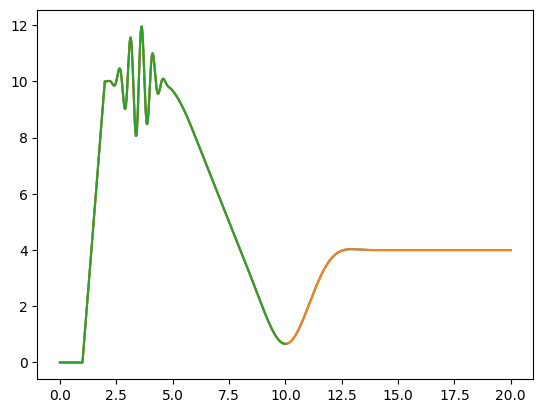

In [59]:
plt.plot(t, f)

t_l, f_l = lengthen_func(f, 20, 100)
plt.plot(t_l, f_l)

t_s, f_s = shorten_func(f, 10, 100)
plt.plot(t_s, f_s)

# To units

In [60]:
def x_mm_to_units(mm):
    return int(mm * 4000 / 8 )

def alpha_angle_to_units(angle):
    return int(angle * 4000 / 360)
    
mm2units = np.vectorize(x_mm_to_units)
angle2units = np.vectorize(alpha_angle_to_units)

In [61]:
""" 
Tipos de operaciones:
- new_route, [t_max, Fs]
- add_point, [t, value]
- delete_point, [t, value]
- vibrato, [t_inicio, t_vibrato, amp, freq, ventana]
- delete_vibrato, [t_inicio, t_vibrato, amp, freq, ventana]
- filter, [i_init, i_end, filter, params]
- delete_filter, [i_init, i_end, filter, params]
- change_duration, [new_t_max]
"""

' \nTipos de operaciones:\n- new_route, [t_max, offset, Fs]\n- add_point, [t, value]\n- delete_point, [t, value]\n- vibrato, [t_inicio, t_vibrato, amp, freq, ventana]\n- delete_vibrato, [t_inicio, t_vibrato, amp, freq, ventana]\n- filter, [i_init, i_end, filter, params]\n- delete_filter, [i_init, i_end, filter, params]\n- change_duration, [new_t_max]\n'

In [72]:
def calculate_route(operations):
    points = []
    vibratos = []
    filters = []
    for op in operations:
        instr  = op[0]
        params = op[1]
        if instr == 'new_route':
            t_total = params[0]
            Fs = params[1]
            f = get_new_route(t_total, Fs)
        elif instr == "add_point":
            points.append(params)
        elif instr == "delete_point":
            points.remove(params)
        elif instr == "vibrato":
            vibratos.append(params)
        elif instr == "delete_vibrato":
            vibratos.remove(params)
        elif instr == "filter":
            filters.append(params)
        elif instr == "delete_filter":
            filters.remove(params)
        elif instr == "change_duration":
            last_dur = params[0]
            if last_dur > t_total:
                t_total = last_dur
                f = get_new_route(t_total, Fs)
    f = get_route_ramped(points, t_total, Fs=Fs)
    for filt in filters:
        i_init = filt[0]
        i_end = filt[1]
        filter = filt[2]
        params = filt[3]
        f = filter_part_func(f, i_init, i_end, filter, params, Fs)
    for vib in vibratos:
        t_init = vib[0]
        t_vibrato = vib[1]
        amp = vib[2]
        freq = vib[3]
        window = vib[4]
        f = sum_vibrato(f, t_init, t_vibrato, amp, freq, window, t_total, Fs=Fs)
    t, f = change_duration(f, last_dur, Fs)
    return t, f

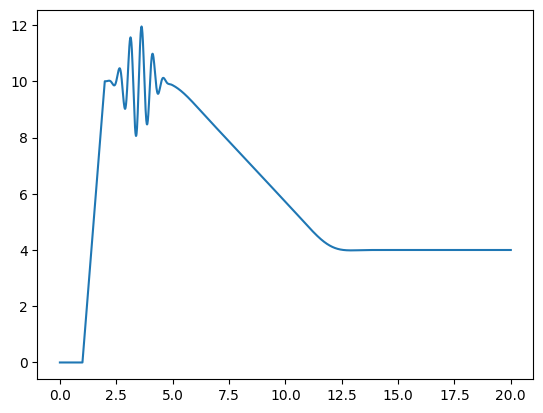

In [77]:

route_operations = [['new_route', [15, 100]],
                    ['add_point', [0, 0]],
                    ['add_point', [1, 0]],
                    ['add_point', [2, 10]],
                    ['add_point', [5, 10]],
                    ['add_point', [10, 0]],
                    ['add_point', [12, 4]],
                    ['vibrato', [2, 3, 2, 4, 'blackman']],
                    ['filter', [3, 14, "firwin", ["hann", 500, 0.4]]],
                    ['change_duration', [20]],
                    ['delete_point', [10, 0]]]

t, f = calculate_route(route_operations)

plt.plot(t, f)

In [9]:
a = np.linspace(1, 2, 10)

In [10]:
a.searchsorted(1.5)

5

In [16]:
a[5+1:]

array([1.66666667, 1.77777778, 1.88888889, 2.        ])

In [7]:
a.index(67)

5

In [1]:
import sounddevice as sd

In [3]:
l = sd.query_devices()

In [8]:
for device in sd.query_devices():
    if device["max_input_channels"]:
        print(device)

{'name': 'Asignador de sonido Microsoft - Input', 'index': 0, 'hostapi': 0, 'max_input_channels': 2, 'max_output_channels': 0, 'default_low_input_latency': 0.09, 'default_low_output_latency': 0.09, 'default_high_input_latency': 0.18, 'default_high_output_latency': 0.18, 'default_samplerate': 44100.0}
{'name': 'Micrófono (Scarlett 2i2 USB)', 'index': 1, 'hostapi': 0, 'max_input_channels': 2, 'max_output_channels': 0, 'default_low_input_latency': 0.09, 'default_low_output_latency': 0.09, 'default_high_input_latency': 0.18, 'default_high_output_latency': 0.18, 'default_samplerate': 44100.0}
{'name': 'Varios micrófonos (Intel® Smart', 'index': 2, 'hostapi': 0, 'max_input_channels': 2, 'max_output_channels': 0, 'default_low_input_latency': 0.09, 'default_low_output_latency': 0.09, 'default_high_input_latency': 0.18, 'default_high_output_latency': 0.18, 'default_samplerate': 44100.0}
{'name': 'Controlador primario de captura de sonido', 'index': 6, 'hostapi': 1, 'max_input_channels': 2, 'max

In [18]:
l[6]

{'name': 'Controlador primario de captura de sonido',
 'index': 6,
 'hostapi': 1,
 'max_input_channels': 2,
 'max_output_channels': 0,
 'default_low_input_latency': 0.12,
 'default_low_output_latency': 0.0,
 'default_high_input_latency': 0.24,
 'default_high_output_latency': 0.0,
 'default_samplerate': 44100.0}

In [15]:
l

   0 Asignador de sonido Microsoft - Input, MME (2 in, 0 out)
>  1 Micrófono (Scarlett 2i2 USB), MME (2 in, 0 out)
   2 Varios micrófonos (Intel® Smart, MME (2 in, 0 out)
   3 Asignador de sonido Microsoft - Output, MME (0 in, 2 out)
<  4 Altavoces (Scarlett 2i2 USB), MME (0 in, 2 out)
   5 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   6 Controlador primario de captura de sonido, Windows DirectSound (2 in, 0 out)
   7 Micrófono (Scarlett 2i2 USB), Windows DirectSound (2 in, 0 out)
   8 Varios micrófonos (Intel® Smart Sound Technology for Digital Microphones), Windows DirectSound (2 in, 0 out)
   9 Controlador primario de sonido, Windows DirectSound (0 in, 2 out)
  10 Altavoces (Scarlett 2i2 USB), Windows DirectSound (0 in, 2 out)
  11 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 Speaker (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  13 Altavoces (Scarlett 2i2 USB), Windows WASAPI (0 in, 2 out)
  14 Micrófono (Scarlett 2i2 USB), Windows WASAPI (2 in, 0 out)


In [19]:
sd.query_hostapis()

({'name': 'MME',
  'devices': [0, 1, 2, 3, 4, 5],
  'default_input_device': 1,
  'default_output_device': 4},
 {'name': 'Windows DirectSound',
  'devices': [6, 7, 8, 9, 10, 11],
  'default_input_device': 6,
  'default_output_device': 9},
 {'name': 'ASIO',
  'devices': [],
  'default_input_device': -1,
  'default_output_device': -1},
 {'name': 'Windows WASAPI',
  'devices': [12, 13, 14, 15],
  'default_input_device': 14,
  'default_output_device': 13},
 {'name': 'Windows WDM-KS',
  'devices': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
  'default_input_device': 28,
  'default_output_device': 27})

In [5]:
import sounddevice as sd
import soundfile as sf
import numpy as np
import sys
import io

In [2]:
filename = 'grabacion.wav'  # nombre del archivo de salida
samplerate = 44100
buffer = io.BytesIO()
# función que se ejecutará en un hilo separado
def callback(indata, frames, time, status):
    buffer.write(indata.copy())

# comenzar la grabación en segundo plano
with sd.InputStream(callback=callback):
    sd.sleep(int(5 * 1000))

In [14]:
buffer.seek(0)
sf.write("grabacion.wav", buffer.read(), samplerate)

IndexError: tuple index out of range

In [11]:
sf.__libsndfile_version__

'1.2.0'

In [40]:
import io
import wave
import sounddevice as sd
from scipy.io.wavfile import write

# Configuración de la grabación
duration = 5  # duración de la grabación en segundos
sample_rate = 44100  # tasa de muestreo en Hz
channels = 1  # número de canales (mono=1, stereo=2)

# Crear el búfer
buffer = io.BytesIO()
mic_data = np.array([])

# Función para guardar los datos en el búfer
def callback(indata, frames, time, status):
    global mic_data
    if status:
        print(status)
    buffer.write(indata)
    mic_data = np.hstack((mic_data, np.transpose(indata)[0]))
    # print(indata)
    # print(np.transpose(indata)[0])

# Crear el objeto InputStream
stream = sd.InputStream(samplerate=sample_rate, channels=channels, callback=callback, device=1, latency='high')

# Empezar la grabación
with stream:
    print("Grabando...")
    sd.sleep(int(duration * 1000))
    
# Convertir los datos del búfer en un archivo WAV
buffer.seek(0)
wav_file = wave.open("grabacion.wav", 'wb')
wav_file.setnchannels(channels)
wav_file.setsampwidth(2)
wav_file.setframerate(sample_rate)
wav_file.writeframes(buffer.read())
wav_file.close()

# write("grabacion.wav", sample_rate, buffer.read())
write("grabacion2.wav", sample_rate, mic_data)

print("Grabación finalizada.")


Grabando...
Grabación finalizada.


In [60]:
print(buffer.tell(), mic_data.size)
buffer.seek(0)
deserialized_bytes = np.frombuffer(buffer.read(), dtype=np.float32)
deserialized_bytes.size
write("grabacion3.wav", sample_rate, deserialized_bytes)

881536 220384


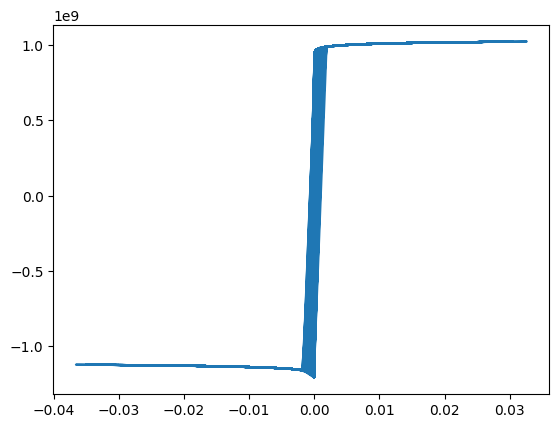

In [58]:
plt.plot(mic_data, deserialized_bytes)
plt.show()

In [21]:
import sounddevice as sd
import wave

fs = 44100  # Frecuencia de muestreo
duration = 5  # Duración de la grabación en segundos
filename = "grabacion.wav"  # Nombre del archivo de salida

# Crea el objeto sounddevice.InputStream
stream = sd.InputStream(channels=1, samplerate=fs)

# Crea el objeto wave para escribir el archivo de salida
with wave.open(filename, mode='wb') as wf:
    wf.setnchannels(1)
    wf.setsampwidth(2)
    wf.setframerate(fs)

    # Inicia la grabación
    with stream:
        print("Grabando...")
        audio_frames = []
        n_frames = int(fs * duration)
        for i in range(n_frames):
            data, _ = stream.read(1)
            audio_frames.append(data)
            wf.writeframes(data)

    print(f"Grabación completada. Archivo guardado en '{filename}'")


Grabando...
Grabación completada. Archivo guardado en 'grabacion.wav'
